In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
# IMDbデータセットの読み込み
(train_data, train_labels), (test_data, test_lebels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# レビューを英語の分に復元

# word_indexは単語を整数のインデックスにマッピングする辞書
word_index = imdb.get_word_index()

# 整数のインデックスを単語にマッピング
revese_word_index = dict([(value, key) for (key, value) in word_index.items()])

# レビューをデコード: インデックスのオフセットとして３が指定されているのは
# 0, 1, 2がそれぞれ「パディング」，「シーケンスの開始」，「不明」の
# インデックスとして予約されているためであることに注意
decoded_review = ' '.join([revese_word_index.get(i - 3, '?') for i in train_data[0]])

# デコードしたレビューの内容を表示
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
# 整数の試験すを二値行列に変換
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 形状が(len(sequential, dimension))の行列を作成し，０で埋める
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # resluts[i]のインデックスを１に設定
        
    return results

# 訓練データのベクトル化
x_train = vectorize_sequences(train_data)

# テストデータのベクトル化
x_test = vectorize_sequences(test_data)

In [9]:
# ベクトル化されていることの確認
#x_train[0]
#x_train[1]
#x_train[2]
x_train[3]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# ラベルのベクトル化
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_lebels).astype('float32')

In [11]:
#　ラベルの確認
y_train
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [12]:
# モデルの定義
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 341us/sample - loss: 0.5275 - accuracy: 0.7799 - val_loss: 0.4039 - val_accuracy: 0.8562
Epoch 2/20
15000/15000 [==============================] - 2s 110us/sample - loss: 0.3147 - accuracy: 0.8986 - val_loss: 0.3163 - val_accuracy: 0.8829
Epoch 3/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.2292 - accuracy: 0.9276 - val_loss: 0.2836 - val_accuracy: 0.8903
Epoch 4/20
15000/15000 [==============================] - 3s 181us/sample - loss: 0.1810 - accuracy: 0.9428 - val_loss: 0.2795 - val_accuracy: 0.8872
Epoch 5/20
15000/15000 [==============================] - 2s 141us/sample - loss: 0.1482 - accuracy: 0.9531 - val_loss: 0.2766 - val_accuracy: 0.8888
Epoch 6/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.1195 - accuracy: 0.9634 - val_loss: 0.2993 - val_accuracy: 0.8811
Epoch 7/20
15000/15000 [==========================

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

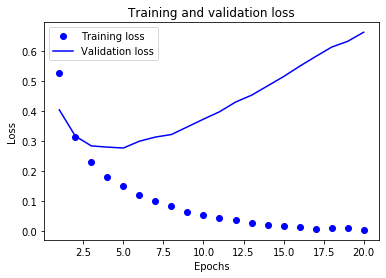

In [17]:
# 訓練データと検証デーでの損失ちをプロット
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

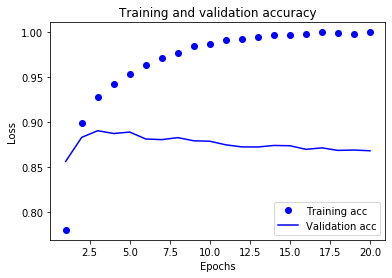

In [18]:
# 訓練データと検証データでの正解率をプロット
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# モデルの訓練をやり直す
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=4, 
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)


Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 191us/sample - loss: 0.4588 - accuracy: 0.8216 - val_loss: 0.2975 - val_accuracy: 0.9022
Epoch 2/4
25000/25000 [==============================] - 2s 98us/sample - loss: 0.2577 - accuracy: 0.9105 - val_loss: 0.1988 - val_accuracy: 0.9366
Epoch 3/4
25000/25000 [==============================] - 2s 99us/sample - loss: 0.2017 - accuracy: 0.9281 - val_loss: 0.1577 - val_accuracy: 0.9505
Epoch 4/4
25000/25000 [==============================] - 2s 97us/sample - loss: 0.1687 - accuracy: 0.9394 - val_loss: 0.1325 - val_accuracy: 0.9589
25000/1 [============================================================================================================================================================================================================================================================================================================================================================

In [20]:
# 誤答率と正答率
results

[0.2904322021865845, 0.8856]

In [21]:
# 新しいデータの予測
model.predict(x_test)

array([[0.19643599],
       [0.99988   ],
       [0.9060983 ],
       ...,
       [0.14895153],
       [0.0837954 ],
       [0.59141624]], dtype=float32)